In [ ]:
import pandas as pd
import numpy as np
from math import * 
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
from cdlib import algorithms
import pickle

%matplotlib inline
plt.figure(figsize=(16,16))
plt.rcParams.update({'figure.figsize': (16, 8)})

<Figure size 1152x1152 with 0 Axes>

In [ ]:
# assign nodes to communities
def get_community(coms):
    length = data.shape[0]
    nodes = data.head(length).index.tolist()
    clusters = np.zeros(length, dtype= int )
    for n in nodes:
        for i in range(len(coms)):
            if n in coms[i]:
                clusters[ nodes.index(n)] = i
  
    result = pd.DataFrame({'node' : nodes, 'community' : clusters})
    return result


# distribution
def distribution(result):
    d = result.groupby('community').size().to_dict()
    d = pd.DataFrame({'community' : d.keys(), 'size' : d.values()})
    ax = d.plot.bar(x = "community", y = 'size') 
    plt.title('node distribution')
    plt.xlabel('community')
    plt.ylabel('nodes number')
    plt.grid(axis='y', alpha=0.75)
    # add the value of each bar 
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    return

In [ ]:
def plot_coms(coms):
    k = len(coms)
  
    node_size=[]
    for i in range(k):
        com_list=[]
        for j in coms[i]:
            list1 = data.head(k).index.tolist()
            if j in list1:
                com_list.append(1000)
            else:
                com_list.append(100)
        node_size.append(com_list)
      
    keyList = data.head(k).index.tolist()
    myDict = {key: key for key in keyList}

    colors=['red','blue','yellow','green','lightblue','brown','grey','purple','pink','orange', 'aqua','olive','indigo', 'lawngreen', 'burlywood','slategray']
    shapes=['s','o','^','>','v','<','d','p','h','8','s','o','^','>','v','<','d','p','h','8']
    for i in range(k):
        nx.draw_networkx(G, pos=sp, nodelist = coms[i], node_color= colors[i],node_shape=shapes[i],node_size = node_size[i] ,with_labels=False , edgecolors='black')
  
    labels=nx.draw_networkx_labels(G,pos = sp, labels=myDict, font_color='w', font_weight='bold')
    return

In [ ]:
#create the Graph
G = nx.read_edgelist("facebook_combined.txt", nodetype = int)

In [ ]:
#load graph layout
with open('networkShape.pkl', 'rb') as f:
    sp = pickle.load(f)

In [ ]:
#read the top k nodes
data = pd.read_csv("TOPSIS_result.csv", header = 0)
data.drop(columns=['TOPSIS'], inplace=True)
data = data.set_index('node')

# LOUVAIN Algorithm

In [ ]:
louvain_coms = algorithms.louvain(G)
louvain_coms = louvain_coms.communities

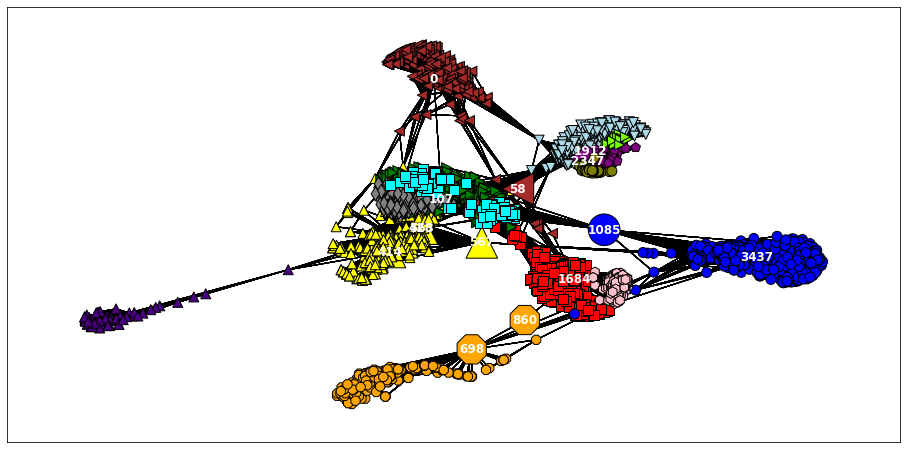

In [ ]:
plot_coms(louvain_coms)

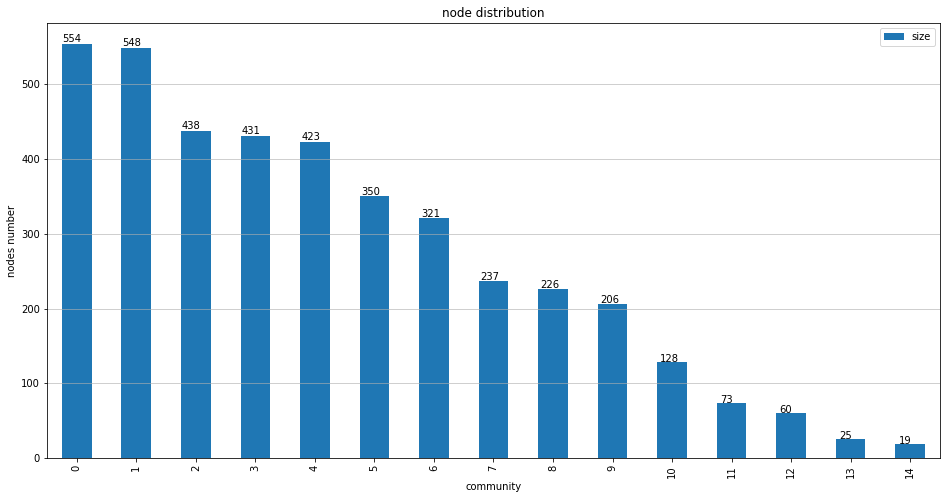

In [ ]:
c = get_community(louvain_coms)
distribution(c)

# GREEDY_MODULARITY Algorithm

In [ ]:
greedy_coms = sorted(nxcom.greedy_modularity_communities(G),
                     key=len, reverse=True)

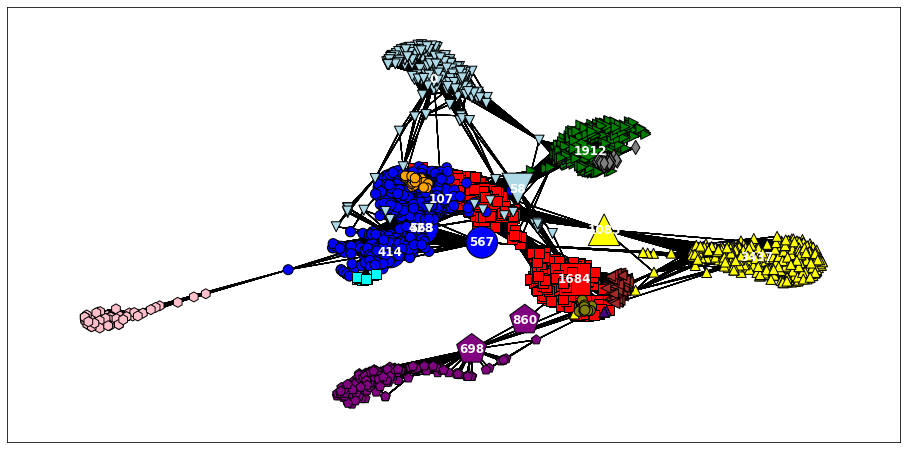

In [ ]:
plot_coms(greedy_coms)

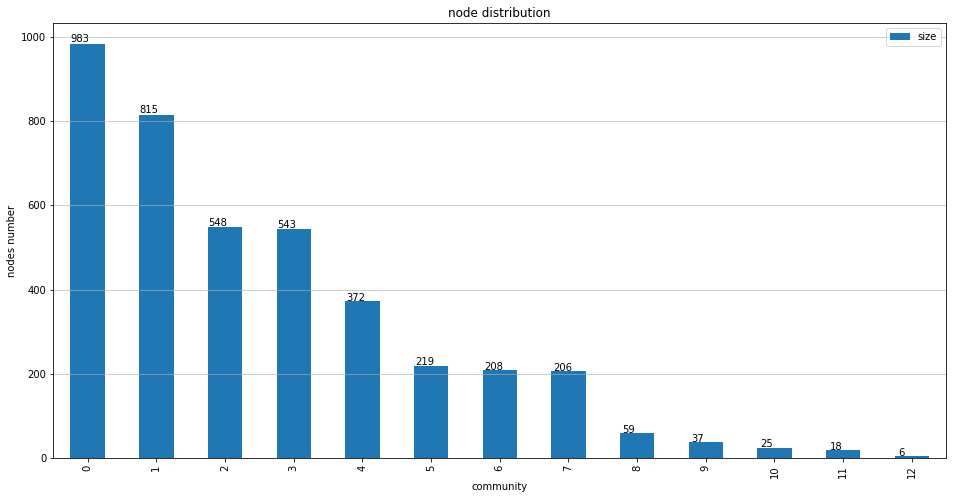

In [ ]:
c = get_community(greedy_coms)
distribution(c)